# Fanout Generator
---

In [1]:
from collections import deque

import matplotlib.pyplot as plt
import matplotlib 
import matplotlib.cm as cm
import matplotlib.transforms as mtransforms

from decimal import *
import numpy as np

## Functions

In [2]:
def calcualte_numbers_and_grids(A_val,B_val, layer_max_number, layer_distance = 4):
    A = Decimal(A_val)
    B = Decimal(B_val)
    Delta = A - B

    Numbers = []

    Major_Grid_x = []
    Major_Grid_y = []

    Minor_Grid_x = []
    Minor_Grid_y = []

    Sending_Grid_x = []
    Sending_Grid_y = []

    Recieivng_Grid_x = []
    Recieivng_Grid_y = []

    for layer_number in range(0,layer_max_number):
        
        nodes_in_layer = layer_number + 1
        wavefronts_in_layer = 2*nodes_in_layer

        current_number = layer_number*A
        
        layer_x = layer_number * layer_distance
        layer_max_y = layer_x
        
        Numbers.append(current_number)
        
        # Major Grid
        Major_Grid_x.append(layer_x)
        Major_Grid_y.append(layer_max_y)
        
        # Minor Grid
        Minor_Grid_x.append(layer_x + layer_distance/2)
        Minor_Grid_y.append(layer_max_y + layer_distance/2)
        
        Minor_Grid_x.append(layer_x + layer_distance/2)
        Minor_Grid_y.append(layer_max_y - layer_distance/2)
        
        # Sending Grid
        Sending_Grid_x.append(layer_x + layer_distance/4)
        Sending_Grid_y.append(layer_max_y + layer_distance/4)
        
        Sending_Grid_x.append(layer_x + layer_distance/4)
        Sending_Grid_y.append(layer_max_y - layer_distance/4)
        
        # Recieving Grid
        Recieivng_Grid_x.append(layer_x + 3*layer_distance/4)
        Recieivng_Grid_y.append(layer_max_y + 3*layer_distance/4)

        Recieivng_Grid_x.append(layer_x + 3*layer_distance/4)
        Recieivng_Grid_y.append(layer_max_y - 3*layer_distance/4)

        current_y = layer_max_y
        
        for _ in range(1,layer_number+1):
            
            current_number = current_number - Delta
            current_y = current_y - 2*layer_distance
            
            Numbers.append(current_number)
            
            # Major Grid
            Major_Grid_x.append(layer_x)
            Major_Grid_y.append(current_y)
            
            # Minor Grid
            Minor_Grid_x.append(layer_x + layer_distance/2)
            Minor_Grid_y.append(current_y + layer_distance/2)
            
            Minor_Grid_x.append(layer_x + layer_distance/2)
            Minor_Grid_y.append(current_y - layer_distance/2)
            
            # Sending Grid
            Sending_Grid_x.append(layer_x + layer_distance/4)
            Sending_Grid_y.append(current_y + layer_distance/4)
            
            Sending_Grid_x.append(layer_x + layer_distance/4)
            Sending_Grid_y.append(current_y - layer_distance/4)
            
            # Recieving Grid
            Recieivng_Grid_x.append(layer_x + 3*layer_distance/4)
            Recieivng_Grid_y.append(current_y + 3*layer_distance/4)

            Recieivng_Grid_x.append(layer_x + 3*layer_distance/4)
            Recieivng_Grid_y.append(current_y - 3*layer_distance/4)
    return(  
        Numbers, 
        Major_Grid_x, Major_Grid_y,
        Minor_Grid_x, Minor_Grid_y,
        Sending_Grid_x, Sending_Grid_y,
        Recieivng_Grid_x, Recieivng_Grid_y
    )

In [3]:
def calcualte_numbers_and_grids_and_lines(A_val,B_val, layer_max_number, layer_distance = 4):
    A = Decimal(A_val)
    B = Decimal(B_val)
    Delta = A - B

    Numbers = []

    Major_Grid_x = []
    Major_Grid_y = []

    Minor_Grid_x = []
    Minor_Grid_y = []

    Sending_Grid_x = []
    Sending_Grid_y = []

    Recieivng_Grid_x = []
    Recieivng_Grid_y = []

    Line_Grid_px = []
    Line_Grid_py = []

    for layer_number in range(0,layer_max_number):
        
        nodes_in_layer = layer_number + 1
        wavefronts_in_layer = 2*nodes_in_layer

        current_number = layer_number*A
        
        layer_x = layer_number * layer_distance
        layer_max_y = layer_x
        
        Numbers.append(current_number)
        
        # Major Grid
        Major_Grid_x.append(layer_x)
        Major_Grid_y.append(layer_max_y)
        
        # Minor Grid
        Minor_Grid_x.append(layer_x + layer_distance/2)
        Minor_Grid_y.append(layer_max_y + layer_distance/2)
        
        Minor_Grid_x.append(layer_x + layer_distance/2)
        Minor_Grid_y.append(layer_max_y - layer_distance/2)
        
        # Sending Grid
        Sending_Grid_x.append(layer_x + layer_distance/4)
        Sending_Grid_y.append(layer_max_y + layer_distance/4)
        
        Sending_Grid_x.append(layer_x + layer_distance/4)
        Sending_Grid_y.append(layer_max_y - layer_distance/4)
        
        # Recieving Grid
        Recieivng_Grid_x.append(layer_x + 3*layer_distance/4)
        Recieivng_Grid_y.append(layer_max_y + 3*layer_distance/4)

        Recieivng_Grid_x.append(layer_x + 3*layer_distance/4)
        Recieivng_Grid_y.append(layer_max_y - 3*layer_distance/4)

        # Line Points
        Line_Grid_px.append([layer_x, layer_distance*(layer_max_number)])
        Line_Grid_py.append([layer_max_y, layer_max_y - layer_distance*(layer_max_number - layer_number)])
        
        current_y = layer_max_y
        
        for _ in range(1,layer_number+1):
            
            current_number = current_number - Delta
            current_y = current_y - 2*layer_distance
            
            Numbers.append(current_number)
            
            # Major Grid
            Major_Grid_x.append(layer_x)
            Major_Grid_y.append(current_y)
            
            # Minor Grid
            Minor_Grid_x.append(layer_x + layer_distance/2)
            Minor_Grid_y.append(current_y + layer_distance/2)
            
            Minor_Grid_x.append(layer_x + layer_distance/2)
            Minor_Grid_y.append(current_y - layer_distance/2)
            
            # Sending Grid
            Sending_Grid_x.append(layer_x + layer_distance/4)
            Sending_Grid_y.append(current_y + layer_distance/4)
            
            Sending_Grid_x.append(layer_x + layer_distance/4)
            Sending_Grid_y.append(current_y - layer_distance/4)
            
            # Recieving Grid
            Recieivng_Grid_x.append(layer_x + 3*layer_distance/4)
            Recieivng_Grid_y.append(current_y + 3*layer_distance/4)

            Recieivng_Grid_x.append(layer_x + 3*layer_distance/4)
            Recieivng_Grid_y.append(current_y - 3*layer_distance/4)

        # On last point
        Line_Grid_px.append([layer_x, layer_distance*(layer_max_number)])
        Line_Grid_py.append([current_y, current_y + layer_distance*(layer_max_number - layer_number)])
            
    return(  
        Numbers, 
        Major_Grid_x, Major_Grid_y,
        Minor_Grid_x, Minor_Grid_y,
        Sending_Grid_x, Sending_Grid_y,
        Recieivng_Grid_x, Recieivng_Grid_y,
        Line_Grid_px, Line_Grid_py
    )

In [4]:
def calculate_wavefronts(za,zb,vs,number_of_layers):
    
    
    za_decimal = Decimal(za)
    zb_decimal = Decimal(zb)
    vs_decimal = Decimal(vs)
    io_decimal = vs_decimal/(za_decimal+zb_decimal)

    reflection_decimal = (za_decimal - zb_decimal)/(za_decimal + zb_decimal)

    AA_v_decimal = (-reflection_decimal)
    AA_i_decimal = reflection_decimal
    AA_decimal = np.array([AA_v_decimal,AA_i_decimal])

    AB_v_decimal = (-(1-reflection_decimal))
    AB_i_decimal = (1+reflection_decimal)
    AB_decimal = np.array([AB_v_decimal,AB_i_decimal])

    BA_v_decimal = -(1+reflection_decimal)
    BA_i_decimal = (1-reflection_decimal)
    BA_decimal = np.array([BA_v_decimal,BA_i_decimal])

    BB_v_decimal = (reflection_decimal)
    BB_i_decimal = -(reflection_decimal)
    BB_decimal = np.array([BB_v_decimal,BB_i_decimal])

    SC_decimal = np.array([-1,1])
    OC_decimal = np.array([1,-1])

    def reflect_self_A_decimal(m):
        return np.multiply(m,SC_decimal)

    def reflect_self_B_decimal(m):
        return np.multiply(m,OC_decimal)

    def reflect_AA_decimal(m):
        return np.multiply(m,AA_decimal)

    def reflect_AB_decimal(m):
        return np.multiply(m,AB_decimal)

    def reflect_BA_decimal(m):
        return np.multiply(m,BA_decimal)

    def reflect_BB_decimal(m):
        return np.multiply(m,BB_decimal)
    
    v_s = []
    i_s = []
    p_s = []
    
    v_r = []
    i_r = []
    p_r = []

    a_initial = np.array([io_decimal*za_decimal,io_decimal])
    b_initial = np.array([io_decimal*zb_decimal,io_decimal])

    fan_out_rows = [[a_initial, b_initial]]
    
    v_s.append(io_decimal*za_decimal)
    i_s.append(io_decimal)
    p_s.append(io_decimal*io_decimal*za_decimal)

    v_s.append(io_decimal*zb_decimal)
    i_s.append(io_decimal)
    p_s.append(io_decimal*io_decimal*zb_decimal)

    initial_row = []

    initial_wavefront = reflect_self_A_decimal(a_initial)
    initial_row.append(initial_wavefront)
    v_initial, i_initial = initial_wavefront
    v_r.append(v_initial)
    i_r.append(i_initial)
    p_r.append(v_initial*i_initial)

    initial_wavefront = reflect_self_B_decimal(b_initial)
    initial_row.append(initial_wavefront)
    v_initial, i_initial = initial_wavefront
    v_r.append(v_initial)
    i_r.append(i_initial)
    p_r.append(v_initial*i_initial)

    fan_out_rows.append(initial_row)

    generated_wavefronts = deque()
    merged_wavefronts = []
    self_reflect_wavefronts = []

    for _ in range(1,number_of_layers):

        # Generate New Wavefronts
        generated_wavefronts.clear()
        merged_wavefronts = []
        returning_wavefronts_row = fan_out_rows[-1]

        is_A = True
        for wavefront in returning_wavefronts_row: # before Merging
            if(is_A):
                temp_wavefront_A = reflect_AA_decimal(wavefront)
                temp_wavefront_B = reflect_AB_decimal(wavefront)
                is_A = False
            else:
                temp_wavefront_A = reflect_BA_decimal(wavefront)
                temp_wavefront_B = reflect_BB_decimal(wavefront)
                is_A = True

            generated_wavefronts.append(temp_wavefront_A)
            generated_wavefronts.append(temp_wavefront_B)

        is_First_Wavefronts = True
        while len(generated_wavefronts) > 0: # Merging

            wavefront_A =  generated_wavefronts.popleft()
            wavefront_B =  generated_wavefronts.popleft()

            if(is_First_Wavefronts): # First row
                merged_wavefronts.append(wavefront_A)
                v_temp,i_temp = wavefront_A
                v_s.append(v_temp)
                i_s.append(i_temp)
                p_s.append(v_temp*i_temp)
                
                merged_wavefronts.append(wavefront_B)
                v_temp,i_temp = wavefront_B
                v_s.append(v_temp)
                i_s.append(i_temp)
                p_s.append(v_temp*i_temp)

                is_First_Wavefronts = False
                

            elif(len(generated_wavefronts)==0): # Last row
                merged_wavefronts.append(wavefront_A)
                v_temp,i_temp = wavefront_A
                v_s.append(v_temp)
                i_s.append(i_temp)
                p_s.append(v_temp*i_temp)

                merged_wavefronts.append(wavefront_B)
                v_temp,i_temp = wavefront_B
                v_s.append(v_temp)
                i_s.append(i_temp)
                p_s.append(v_temp*i_temp)

            else: # Middle rows
                wavefront_A2 = generated_wavefronts.popleft()
                wavefront_B2 = generated_wavefronts.popleft()

                wavefront_A = wavefront_A + wavefront_A2
                wavefront_B = wavefront_B + wavefront_B2

                merged_wavefronts.append(wavefront_A)
                v_temp,i_temp = wavefront_A
                v_s.append(v_temp)
                i_s.append(i_temp)
                p_s.append(v_temp*i_temp)

                merged_wavefronts.append(wavefront_B)
                v_temp,i_temp = wavefront_B
                v_s.append(v_temp)
                i_s.append(i_temp)
                p_s.append(v_temp*i_temp)

        fan_out_rows.append(list(merged_wavefronts))
              
        self_reflect_wavefronts.clear()
        most_recent_row = fan_out_rows[-1]
        
        # Generate Self Reflected Wavefronts
        is_A = True
        for wavefront in most_recent_row:

            if(is_A):
                temp_wavefront = reflect_self_A_decimal(wavefront)
                is_A = False
            else:
                temp_wavefront = reflect_self_B_decimal(wavefront)
                is_A = True
            
            self_reflect_wavefronts.append(temp_wavefront)
            v_temp, i_temp = temp_wavefront
            v_r.append(v_temp)
            i_r.append(i_temp)
            p_r.append(v_temp*i_temp)
            

        fan_out_rows.append(self_reflect_wavefronts)
    return v_s,v_r,i_s,i_r,p_s,p_r

## Input Parameters

In [5]:
max_layer_small = 9
max_layer_large = 50
layer_distance = 1

A_str = '7'
B_str = '5'

za_str = "100"
zb_str = "1"

za_decimal = Decimal(za_str)
zb_decimal = Decimal(zb_str)

vs_str = '1'
vs_val = float(vs_str)
vs_decimal = Decimal(vs_str)

is_val = float(vs_decimal/(za_decimal + zb_decimal))

ps_val = float(vs_decimal*vs_decimal/(za_decimal + zb_decimal))

i_scale = float((za_decimal + zb_decimal))

## Small detailed Plots 

### Time of arrival + rainbow plot

[]

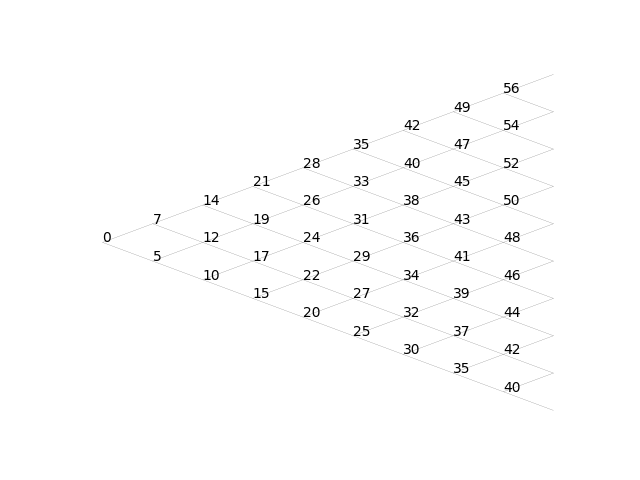

In [20]:
%matplotlib widget
x_max = layer_distance*(max_layer_small)

(N, 
 M_x, M_y, 
 m_x, m_y, 
 s_x, s_y,
 r_x, r_y,
 l_x, l_y) = calcualte_numbers_and_grids_and_lines(A_str,B_str,max_layer_small,layer_distance)

v_s,v_r,i_s,i_r,p_s,p_r = calculate_wavefronts(za_str,zb_str,vs_str,max_layer_small)

fig_numbers, ax_numbers = plt.subplots()

# ax_numbers.set_xlim([0,2*x_max])
# ax_numbers.set_ylim([-x_max,x_max])

ax_numbers.set_xticklabels([])
ax_numbers.set_yticklabels ([])
ax_numbers.axis('off')

ax_numbers.scatter(M_x,M_y, s=2, c= 'black')

shift = 0
for i, txt in enumerate(N):
    ax_numbers.text(M_x[i]-shift, M_y[i]-shift,txt)

for x, y in zip(l_x,l_y):
    ax_numbers.plot(x,y,'k-',linewidth =.1)

ax_numbers.plot()

### Numbers And Magnitudes

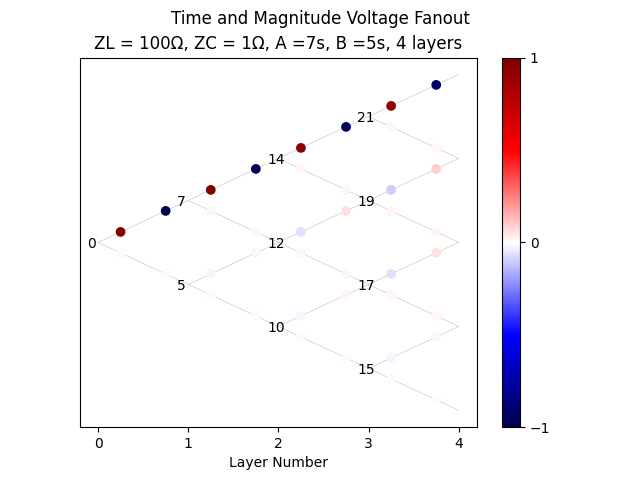

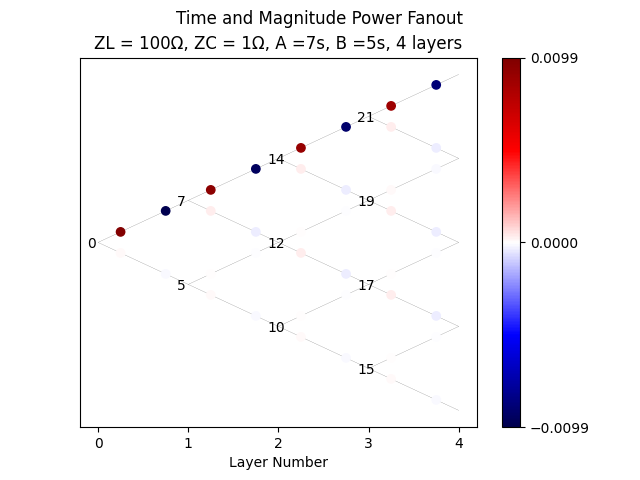

In [38]:
%matplotlib widget
(N, 
 M_x, M_y, 
 m_x, m_y, 
 s_x, s_y,
 r_x, r_y,
 l_x,l_y) =calcualte_numbers_and_grids_and_lines(A_str,B_str,max_layer_small)

v_s,v_r,i_s,i_r,p_s,p_r = calculate_wavefronts(za_str,zb_str,vs_str,max_layer_small)

fig_voltage, ax_voltage = plt.subplots()
plt.suptitle('Time and Magnitude Voltage Fanout',fontsize='large')
ax_voltage.set_title('ZL = '+za_str+'Ω,' + ' ZC = ' + zb_str+'Ω, A ='+A_str+'s, B ='+ B_str+'s, ' +str(max_layer_small)+' layers')

cax = ax_voltage.scatter(s_x,s_y,c=v_s,cmap=cm.seismic,vmax=vs_val, vmin=-vs_val, zorder=2)
ax_voltage.scatter(r_x,r_y,c=v_r,cmap=cm.seismic,vmax=vs_val, vmin=-vs_val, zorder=2)

cbar = fig_voltage.colorbar(cax, ticks=[-vs_val, 0, vs_val])

for x, y in zip(l_x,l_y):
    ax_voltage.plot(x,y,'k-',linewidth =.1, zorder =1)

ax_voltage.set_yticks([])
plt.xticks(np.arange(0, (max_layer_small+1)*4, 4),np.arange(0, max_layer_small+1, 1))
plt.xlabel("Layer Number")

shift = 0.5
for i, txt in enumerate(N):
    ax_voltage.text(M_x[i]-shift, M_y[i]-shift,txt)
    
    
    
    


fig_current, ax_current = plt.subplots()

plt.suptitle('Time and Magnitude Current Fanout',fontsize='large')
ax_current.set_title('ZL = '+za_str+'Ω,' + ' ZC = ' + zb_str+'Ω, A ='+A_str+'s, B ='+ B_str+'s, ' +str(max_layer_small)+' layers')

# Plotm points
ax_current.scatter(M_x,M_y, s=2, c= 'black')

cax = ax_current.scatter(s_x,s_y,c=i_s,cmap=cm.seismic, vmax=is_val, vmin=-is_val,zorder=2)
ax_current.scatter(r_x,r_y,c=i_r,cmap=cm.seismic, vmax=is_val, vmin=-is_val,zorder=2)

cbar = fig_current.colorbar(cax, ticks=[-is_val, 0, is_val])
cbar.ax.set_yticklabels(['$\mathregular{-I_o}$', '0', '$\mathregular{I_o}$'])

for x, y in zip(l_x,l_y):
    ax_current.plot(x,y,'k-',linewidth =.1,zorder=1)

ax_current.set_yticks([])
plt.xticks(np.arange(0, (max_layer_small+1)*4, 4),np.arange(0, max_layer_small+1, 1))
plt.xlabel("Layer Number")
#plt.grid(axis = 'x')

# plot text
shift = 0.5
for i, txt in enumerate(N):
    ax_current.text(M_x[i]-shift, M_y[i]-shift,txt)



 
fig_power, ax_power = plt.subplots()
plt.suptitle('Time and Magnitude Power Fanout',fontsize='large')
ax_power.set_title('ZL = '+za_str+'Ω,' + ' ZC = ' + zb_str+'Ω, A ='+A_str+'s, B ='+ B_str+'s, ' +str(max_layer_small)+' layers')

for x, y in zip(l_x,l_y):
    ax_power.plot(x,y,'k-',linewidth =.1,zorder=1)

cax = ax_power.scatter(s_x,s_y,c=p_s,cmap=cm.seismic, vmax=ps_val, vmin=-ps_val,zorder=2)
ax_power.scatter(r_x,r_y,c=p_r,cmap=cm.seismic, vmax=ps_val, vmin=-ps_val,zorder=2)

cbar = fig_power.colorbar(cax, ticks=[-ps_val, 0, ps_val])

ax_power.set_yticks([])
plt.xticks(np.arange(0, (max_layer_small+1)*4, 4),np.arange(0, max_layer_small+1, 1))
plt.xlabel("Layer Number")
#plt.grid(axis = 'x')

shift = 0.5
for i, txt in enumerate(N):
    ax_power.text(M_x[i]-shift, M_y[i]-shift,txt)



In [51]:
max_layer_small = 4
plt.rcParams["figure.figsize"] = (5, 5)

(N, 
 M_x, M_y, 
 m_x, m_y, 
 s_x, s_y,
 r_x, r_y,
 l_x,l_y) =calcualte_numbers_and_grids_and_lines(A_str,B_str,max_layer_small)

# invert to make capacitor at top
s_y = [-1*i for i in s_y]
r_y = [-1*i for i in r_y]

v_s,v_r,i_s,i_r,p_s,p_r = calculate_wavefronts(za_str,zb_str,vs_str,max_layer_small)

fig_current, ax_current = plt.subplots()

plt.suptitle('Time and Magnitude Current Fanout',fontsize='large')
ax_current.set_title('$\mathregular{Z_L}$ = '+za_str+'Ω,' + ' $\mathregular{Z_C}$ = ' + zb_str+'Ω, '+str(max_layer_small)+' layers')

# Plotm points
ax_current.scatter(M_x,M_y, s=200, c= 'black')

cax = ax_current.scatter(s_x,s_y,c=i_s,cmap=cm.seismic, vmax=is_val, vmin=-is_val,zorder=2)
ax_current.scatter(r_x,r_y,c=i_r,cmap=cm.seismic, vmax=is_val, vmin=-is_val,zorder=2)

cbar = fig_current.colorbar(cax, ticks=[-is_val, 0, is_val])
cbar.ax.set_yticklabels(['$\mathregular{-i_o}$', '0', '$\mathregular{i_o}$'])

for x, y in zip(l_x,l_y):
    ax_current.plot(x,y,'k-',linewidth =.1,zorder=1)

ax_current.set_yticks([])
plt.xticks(np.arange(0, (max_layer_small+1)*4, 4),np.arange(0, max_layer_small+1, 1))
plt.xlabel("Layer Number")
#plt.grid(axis = 'x')

# plot text
shift = 0.5
for i, txt in enumerate(N):
    pass
    # ax_current.text(M_x[i]-shift, M_y[i]-shift,txt)

## Large Plots

### Calculate large Values

In [8]:
(N, 
 M_x, M_y, 
 m_x, m_y, 
 s_x, s_y,
 r_x, r_y) =calcualte_numbers_and_grids(A_str,B_str,max_layer_large)
v_s,v_r,i_s,i_r,p_s,p_r = calculate_wavefronts(za_str,zb_str,vs_str,max_layer_large)


### Time Of Arrival Colour

In [9]:
fig_numbers, ax_numbers = plt.subplots()
plt.suptitle('Time OF Arrival Fanout',fontsize='large')
ax_numbers.set_title( 'A = '+A_str+'s, B = '+B_str+'s, ' +str(max_layer_large)+' layers')

cax = ax_numbers.scatter(M_x,M_y,c=N,cmap=cm.jet)
cbar = fig_numbers.colorbar(cax, ticks=[0, int(N[len(N)-1]),int(N[len(N)-2*max_layer_large+1])])

ax_numbers.set_yticks([])
ax_numbers.set_xticks([])

[]

### Composite Colour

[]

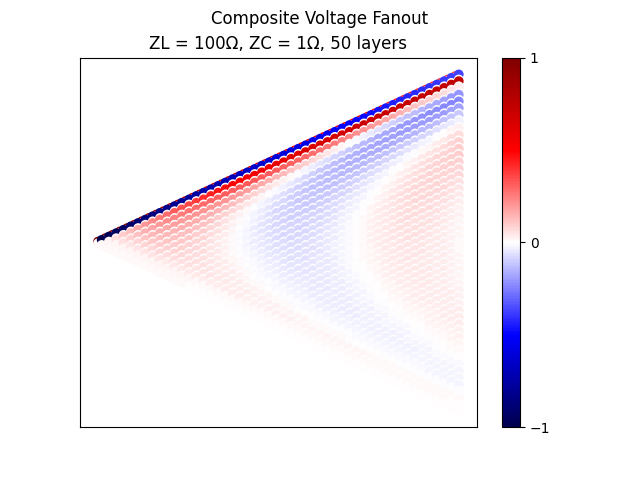

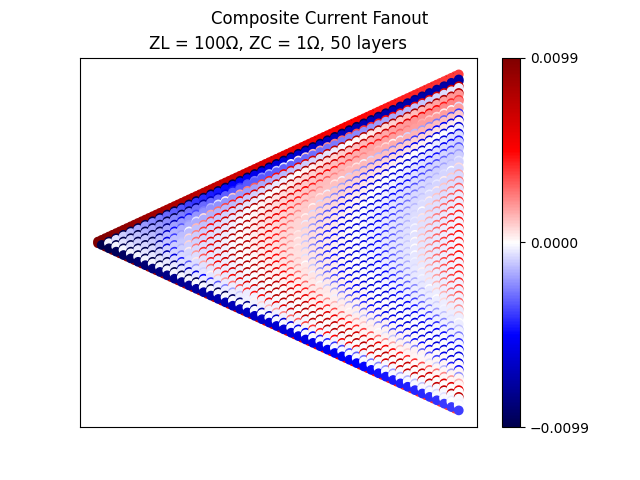

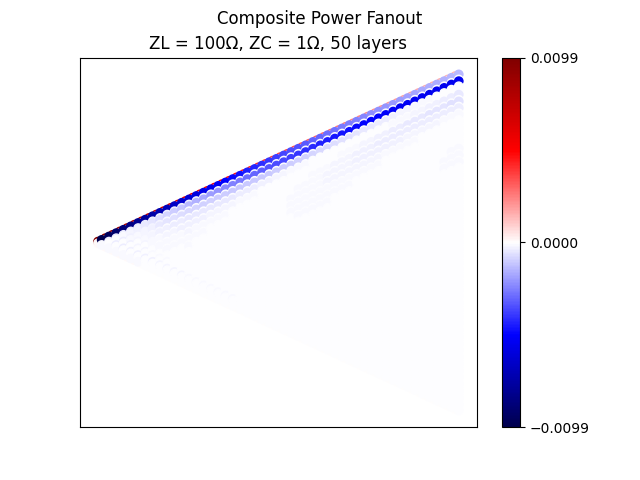

In [10]:
%matplotlib widget
fig_voltage, ax_voltage = plt.subplots()
plt.suptitle('Composite Voltage Fanout',fontsize='large')
ax_voltage.set_title('ZL = '+za_str+'Ω,' + ' ZC = ' + zb_str+'Ω, ' +str(max_layer_large)+' layers')

cax = ax_voltage.scatter(s_x,s_y,c=v_s,cmap=cm.seismic, vmax=vs_val, vmin=-vs_val)
ax_voltage.scatter(r_x,r_y,c=v_r,cmap=cm.seismic, vmax=vs_val, vmin=-vs_val)

cbar = fig_voltage.colorbar(cax, ticks=[-vs_val, 0, vs_val])

ax_voltage.set_yticks([])
ax_voltage.set_xticks([])



fig_current, ax_current = plt.subplots()
plt.suptitle('Composite Current Fanout',fontsize='large')
ax_current.set_title('ZL = '+za_str+'Ω,' + ' ZC = ' + zb_str+'Ω, ' +str(max_layer_large)+' layers')

cax = ax_current.scatter(s_x,s_y,c=i_s,cmap=cm.seismic, vmax=is_val, vmin=-is_val)
ax_current.scatter(r_x,r_y,c=i_r,cmap=cm.seismic, vmax=is_val, vmin=-is_val)

cbar = fig_current.colorbar(cax, ticks=[-is_val, 0, is_val])

ax_current.set_yticks([])
ax_current.set_xticks([])


    
fig_power, ax_power = plt.subplots()
plt.suptitle('Composite Power Fanout',fontsize='large')
ax_power.set_title('ZL = '+za_str+'Ω,' + ' ZC = ' + zb_str+'Ω, ' +str(max_layer_large)+' layers')

cax = ax_power.scatter(s_x,s_y,c=p_s,cmap=cm.seismic, vmax=ps_val, vmin=-ps_val)
ax_power.scatter(r_x,r_y,c=p_r,cmap=cm.seismic, vmax=ps_val, vmin=-ps_val)

cbar = fig_power.colorbar(cax, ticks=[-ps_val, 0, ps_val])

ax_power.set_yticks([])
ax_power.set_xticks([])

### Sending Colour

[]

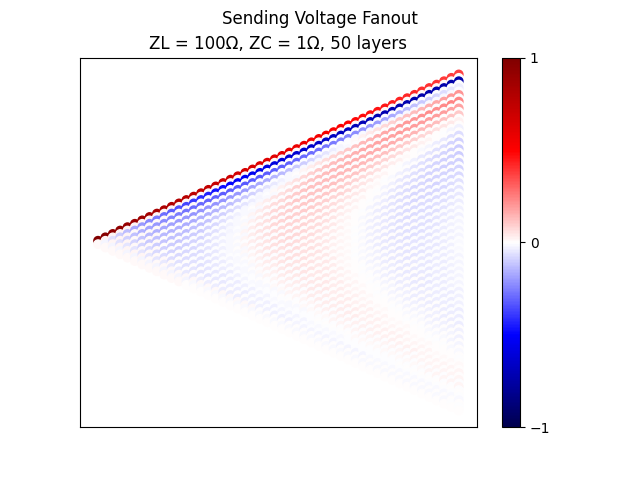

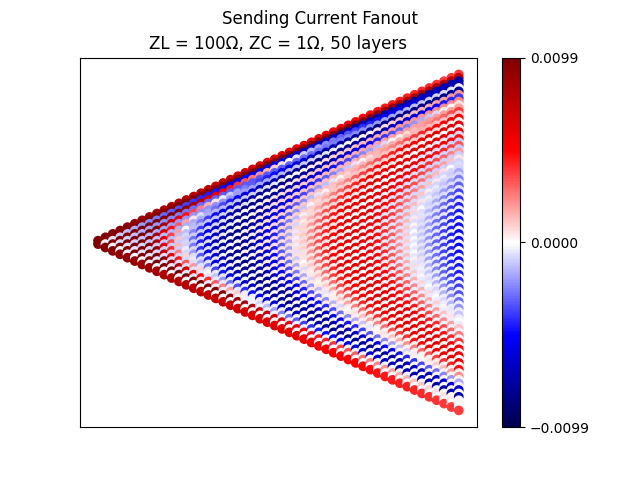

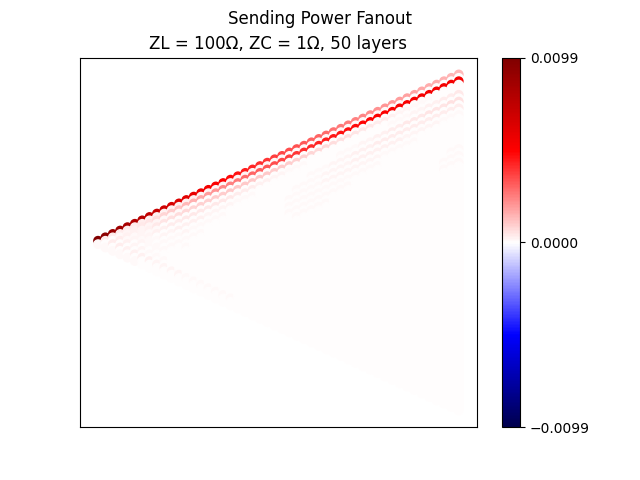

In [11]:
%matplotlib widget
fig_voltage_sending, ax_voltage_sending = plt.subplots()
plt.suptitle('Sending Voltage Fanout',fontsize='large')
ax_voltage_sending.set_title('ZL = '+za_str+'Ω,' + ' ZC = ' + zb_str+'Ω, ' +str(max_layer_large)+' layers')

cax = ax_voltage_sending.scatter(m_x,m_y,c=v_s,cmap=cm.seismic, vmax=vs_val, vmin=-vs_val)
cbar = fig_voltage_sending.colorbar(cax, ticks=[-vs_val, 0, vs_val])

ax_voltage_sending.set_yticks([])
ax_voltage_sending.set_xticks([])


fig_current_sending, ax_current_sending = plt.subplots()
plt.suptitle('Sending Current Fanout',fontsize='large')
ax_current_sending.set_title('ZL = '+za_str+'Ω,' + ' ZC = ' + zb_str+'Ω, ' +str(max_layer_large)+' layers')

cax = ax_current_sending.scatter(m_x,m_y,c=i_s,cmap=cm.seismic, vmax=is_val, vmin=-is_val)
cbar = fig_current_sending.colorbar(cax, ticks=[-is_val, 0, is_val])

ax_current_sending.set_yticks([])
ax_current_sending.set_xticks([])

    
fig_power_sending, ax_power_sending = plt.subplots()
plt.suptitle('Sending Power Fanout',fontsize='large')
ax_power_sending.set_title('ZL = '+za_str+'Ω,' + ' ZC = ' + zb_str+'Ω, ' +str(max_layer_large)+' layers')

cax = ax_power_sending.scatter(m_x,m_y,c=p_s,cmap=cm.seismic, vmax=ps_val, vmin=-ps_val)
cbar = fig_power_sending.colorbar(cax, ticks=[-ps_val, 0, ps_val])

ax_power_sending.set_yticks([])
ax_power_sending.set_xticks([])

### Return Colour

[]

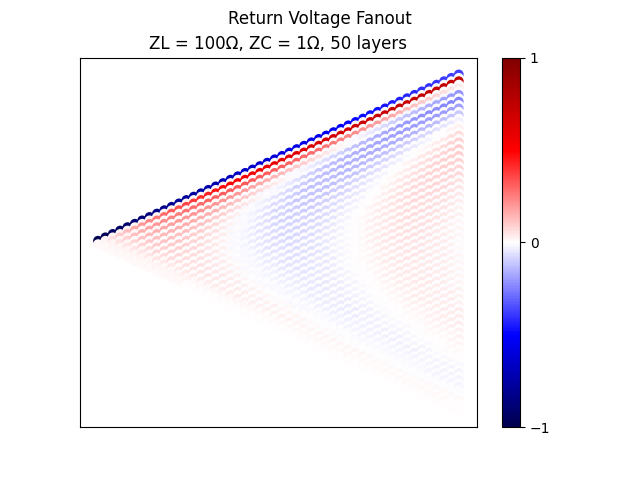

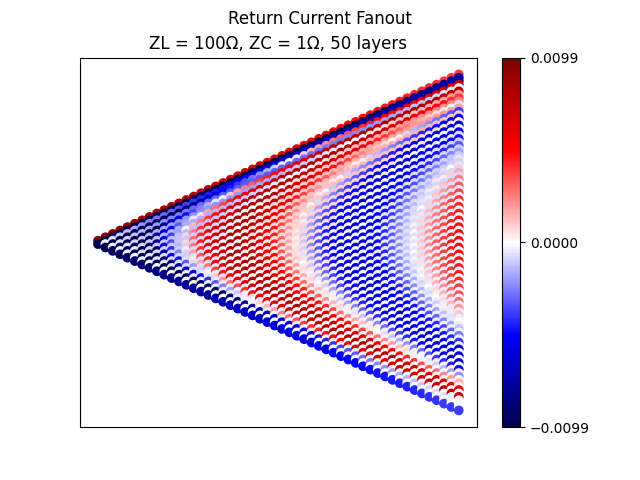

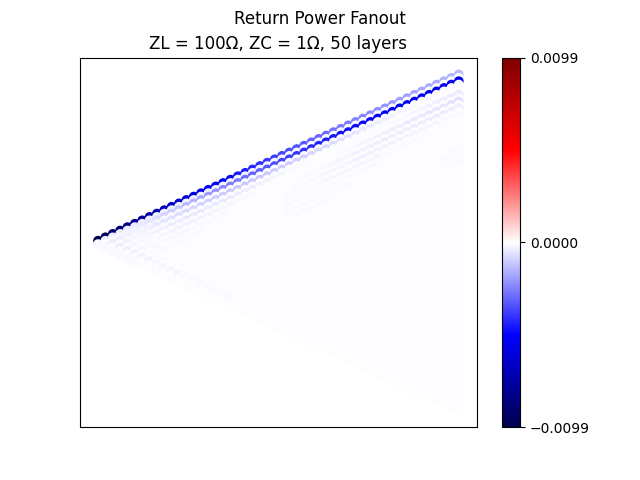

In [12]:
%matplotlib widget
fig_voltage, ax_voltage = plt.subplots()
plt.suptitle('Return Voltage Fanout',fontsize='large')
ax_voltage.set_title('ZL = '+za_str+'Ω,' + ' ZC = ' + zb_str+'Ω, ' +str(max_layer_large)+' layers')

cax = ax_voltage.scatter(m_x,m_y,c=v_r,cmap=cm.seismic, vmax=vs_val, vmin=-vs_val)
cbar = fig_voltage.colorbar(cax, ticks=[-vs_val, 0, vs_val])

ax_voltage.set_yticks([])
ax_voltage.set_xticks([])



fig_current, ax_current = plt.subplots()
plt.suptitle('Return Current Fanout',fontsize='large')
ax_current.set_title('ZL = '+za_str+'Ω,' + ' ZC = ' + zb_str+'Ω, ' +str(max_layer_large)+' layers')

cax = ax_current.scatter(m_x,m_y,c=i_r,cmap=cm.seismic, vmax=is_val, vmin=-is_val)
cbar = fig_current.colorbar(cax, ticks=[-is_val, 0, is_val])

ax_current.set_yticks([])
ax_current.set_xticks([])

    
    
fig_power, ax_power = plt.subplots()
plt.suptitle('Return Power Fanout',fontsize='large')
ax_power.set_title('ZL = '+za_str+'Ω,' + ' ZC = ' + zb_str+'Ω, ' +str(max_layer_large)+' layers')

cax = ax_power.scatter(m_x,m_y,c=p_r,cmap=cm.seismic, vmax=ps_val, vmin=-ps_val)
cbar = fig_power.colorbar(cax, ticks=[-ps_val, 0, ps_val])

ax_power.set_yticks([])
ax_power.set_xticks([])

### Composite Size

In [13]:
size_factor_v = 50
size_factor_i = size_factor_v*i_scale
size_factor_p = 2*size_factor_i

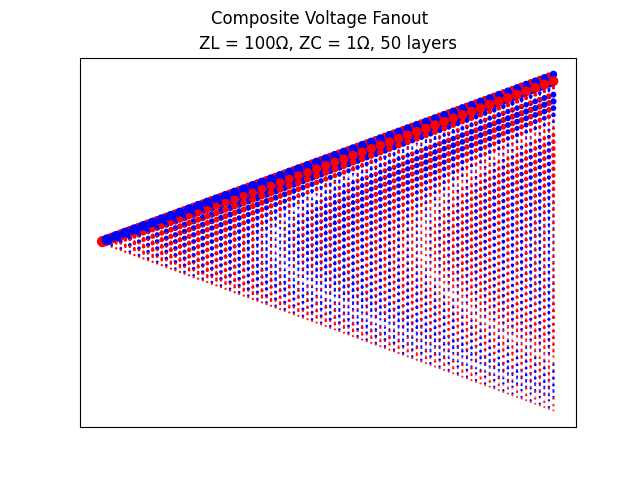

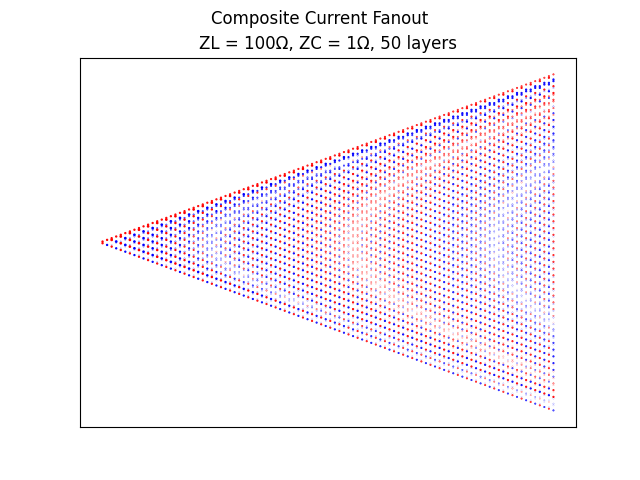

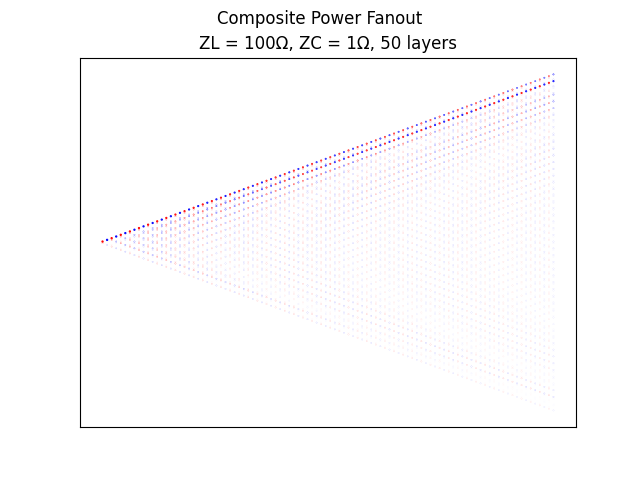

In [14]:

%matplotlib widget
fig_voltage, ax_voltage = plt.subplots()
plt.suptitle('Composite Voltage Fanout',fontsize='large')
ax_voltage.set_title('ZL = '+za_str+'Ω,' + ' ZC = ' + zb_str+'Ω, ' +str(max_layer_large)+' layers')

v_s_float = np.asarray(v_s, dtype = np.float64)
v_s_size = np.absolute(v_s_float*size_factor_v)
v_s_col = np.where(v_s_float>0,'red','blue')

v_r_float = np.asarray(v_r, dtype = np.float64)
v_r_size = np.absolute(v_r_float*size_factor_v)
v_r_col = np.where(v_r_float>0,'red','blue')

ax_voltage.set_yticks([])
ax_voltage.set_xticks([])

ax_voltage.scatter(s_x, s_y, c=v_s_col, s=v_s_size)
ax_voltage.scatter(r_x, r_y, c=v_r_col, s=v_r_size)



fig_current, ax_current = plt.subplots()
plt.suptitle('Composite Current Fanout',fontsize='large')
ax_current.set_title('ZL = '+za_str+'Ω,' + ' ZC = ' + zb_str+'Ω, ' +str(max_layer_large)+' layers')

i_s_float = np.asarray(i_s, dtype = np.float64)
i_s_size = np.absolute(i_s_float*size_factor_v)
i_s_col = np.where(i_s_float>0,'red','blue')

i_r_float = np.asarray(i_r, dtype = np.float64)
i_r_size = np.absolute(i_r_float*size_factor_v)
i_r_col = np.where(i_r_float>0,'red','blue')

ax_current.set_yticks([])
ax_current.set_xticks([])

ax_current.scatter(s_x, s_y, c=i_s_col, s=i_s_size)
ax_current.scatter(r_x, r_y, c=i_r_col, s=i_r_size)




fig_power, ax_power = plt.subplots()
plt.suptitle('Composite Power Fanout',fontsize='large')
ax_power.set_title('ZL = '+za_str+'Ω,' + ' ZC = ' + zb_str+'Ω, ' +str(max_layer_large)+' layers')

p_s_float = np.asarray(p_s, dtype = np.float64)
p_s_size = np.absolute(p_s_float*size_factor_v)
p_s_col = np.where(p_s_float>0,'red','blue')

p_r_float = np.asarray(p_r, dtype = np.float64)
p_r_size = np.absolute(p_r_float*size_factor_v)
p_r_col = np.where(p_r_float>0,'red','blue')

ax_power.set_yticks([])
ax_power.set_xticks([])

ax_power.scatter(s_x, s_y, c=p_s_col, s=p_s_size)
ax_power.scatter(r_x, r_y, c=p_r_col, s=p_r_size)


### Sending Size

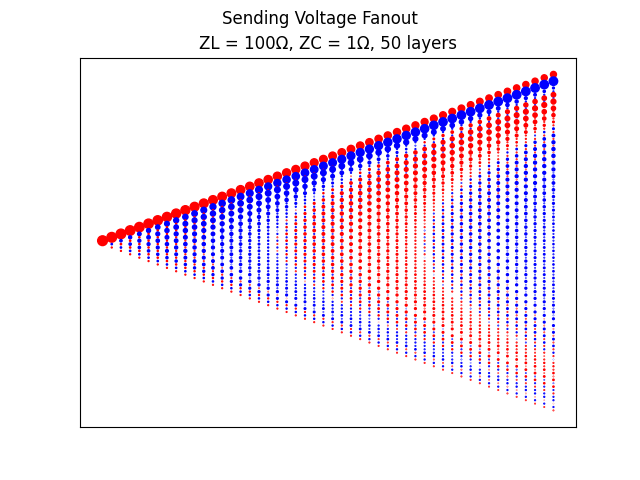

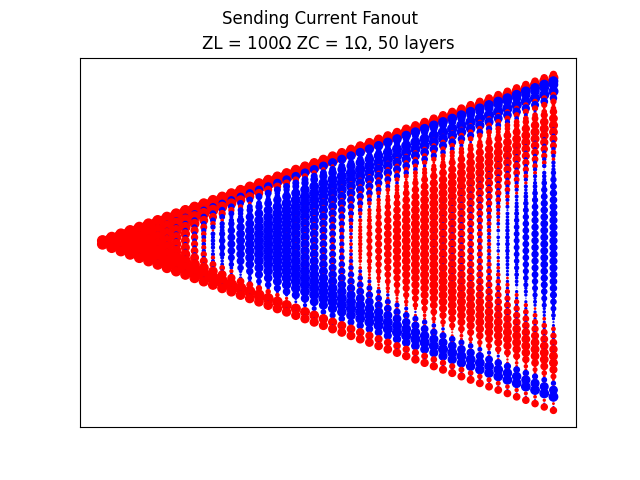

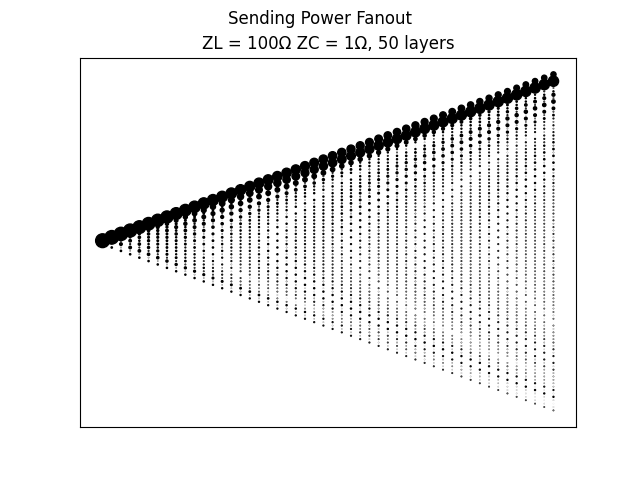

In [15]:
%matplotlib widget
fig_voltage, ax_voltage = plt.subplots()
plt.suptitle('Sending Voltage Fanout',fontsize='large')
ax_voltage.set_title('ZL = '+za_str+'Ω,' + ' ZC = ' + zb_str+'Ω, ' +str(max_layer_large)+' layers')

v_s_float = np.asarray(v_s, dtype = np.float64)
v_s_size = np.absolute(v_s_float*size_factor_v)
v_s_col = np.where(v_s_float>0,'red','blue')

ax_voltage.set_yticks([])
ax_voltage.set_xticks([])

ax_voltage.scatter(m_x,m_y,c=v_s_col,s=v_s_size)



fig_current, ax_current = plt.subplots()
plt.suptitle('Sending Current Fanout',fontsize='large')
ax_current.set_title('ZL = '+za_str+'Ω' + ' ZC = ' + zb_str+'Ω, ' +str(max_layer_large)+' layers')

i_s_float = np.asarray(i_s, dtype = np.float64)
i_s_size = np.absolute(i_s_float*size_factor_i)
i_s_col = np.where(i_s_float>0,'red','blue')

ax_current.set_yticks([])
ax_current.set_xticks([])

ax_current.scatter(m_x,m_y,c=i_s_col,s=i_s_size)



fig_power, ax_power = plt.subplots()
plt.suptitle('Sending Power Fanout',fontsize='large')
ax_power.set_title('ZL = '+za_str+'Ω' + ' ZC = ' + zb_str+'Ω, ' +str(max_layer_large)+' layers')

p_s_float = np.asarray(p_s, dtype = np.float64)
p_s_size = np.absolute(p_s_float*size_factor_p)
p_s_col = np.where(p_s_float>0,'red','blue')

ax_power.set_yticks([])
ax_power.set_xticks([])

ax_power.scatter(m_x,m_y,c='black',s=p_s_size)

### Returning Size

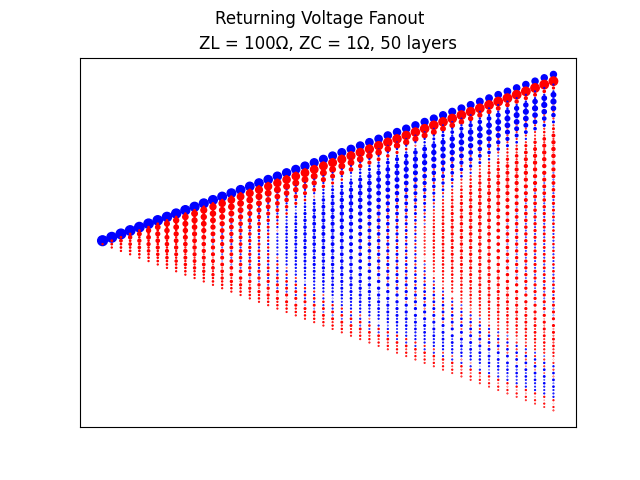

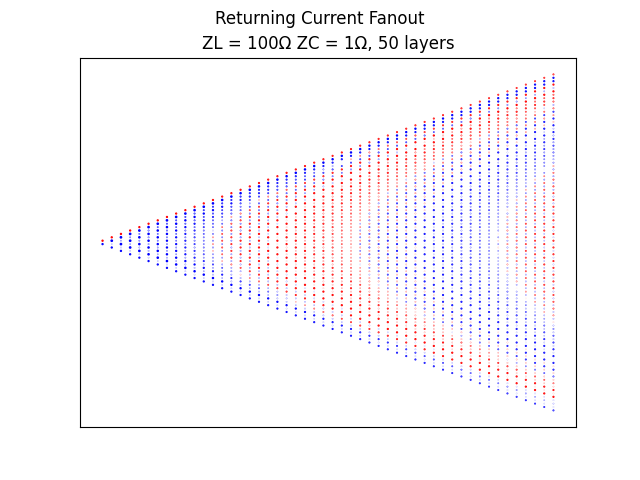

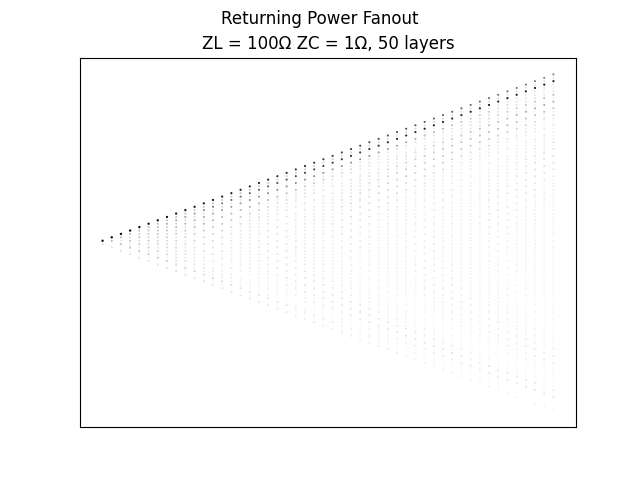

In [16]:

%matplotlib widget
fig_voltage, ax_voltage = plt.subplots()
plt.suptitle('Returning Voltage Fanout',fontsize='large')
ax_voltage.set_title('ZL = '+za_str+'Ω,' + ' ZC = ' + zb_str+'Ω, ' +str(max_layer_large)+' layers')

v_r_float = np.asarray(v_r, dtype = np.float64)
v_r_size = np.absolute(v_r_float*size_factor_v)
v_r_col = np.where(v_r_float>0,'red','blue')

ax_voltage.set_yticks([])
ax_voltage.set_xticks([])

ax_voltage.scatter(m_x, m_y, c=v_r_col, s=v_r_size)


fig_current, ax_current = plt.subplots()
plt.suptitle('Returning Current Fanout',fontsize='large')
ax_current.set_title('ZL = '+za_str+'Ω' + ' ZC = ' + zb_str+'Ω, ' +str(max_layer_large)+' layers')

i_r_float = np.asarray(i_r, dtype = np.float64)
i_r_size = np.absolute(i_r_float*size_factor_v)
i_r_col = np.where(i_r_float>0,'red','blue')

ax_current.set_yticks([])
ax_current.set_xticks([])

ax_current.scatter(m_x, m_y, c=i_r_col, s=i_r_size)



fig_power, ax_power = plt.subplots()
plt.suptitle('Returning Power Fanout',fontsize='large')
ax_power.set_title('ZL = '+za_str+'Ω' + ' ZC = ' + zb_str+'Ω, ' +str(max_layer_large)+' layers')

ax_power.set_yticks([])
ax_power.set_xticks([])

p_r_float = np.asarray(p_r, dtype = np.float64)
p_r_size = np.absolute(p_r_float*size_factor_v)
p_r_col = np.where(p_r_float>0,'red','blue')

ax_power.scatter(m_x, m_y, c='black', s=p_r_size)